# Modeling and Simulation in Python

Final project

July 8, 2020

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

### Packaging optimization 
#### Data 604 final project

This stimulation aims at reducing costs by increasing box height in sterilization load. This is especially true for validation and process verification for new products and materials, which can be complex and time-consuming. Optimizing packaging size in a sterilization load under pre-validated settings streamlines production and reduce costs.

The current pro-validated settings contain density, DUR, and box height. The simulation will evaluate different scenarios that meet all requirements under given conditions. 

#### Research Question
Without changing density and DUR, will box size changing reducing cost of sterilization?

It is assumed that additional box height increases box volume, so box holds more weight, and density remains unchanged.

#### Method
The simulation runs 10 iterations evaluating box height increase to the sterilization radiation dose distribution under existing settings on density and DUR, and look into if the increased sterilization load will reduce cost overall. 

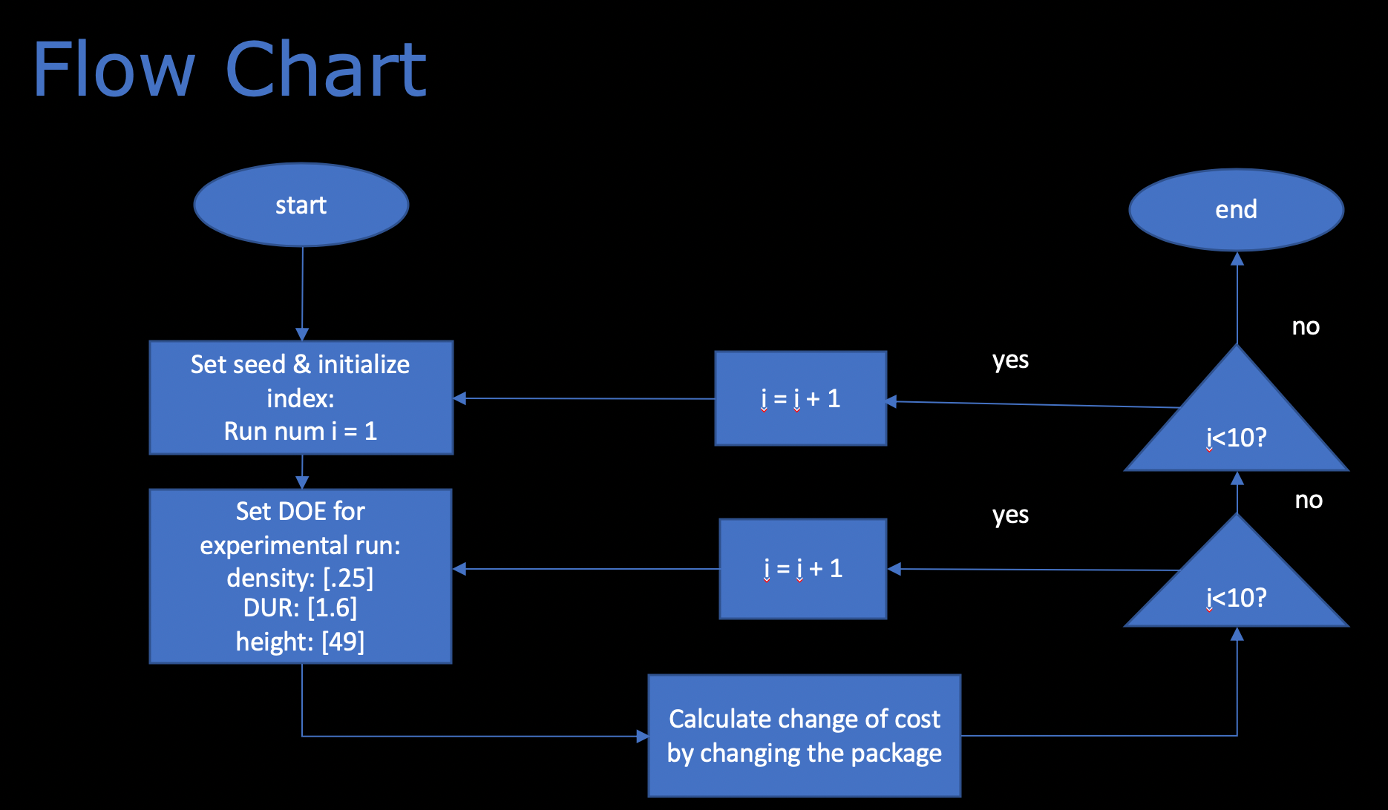

In [2]:
Image(filename="./flowchart.png",width=700, height=600)

#### generate the data table

In [3]:
table = pd.read_csv('data/sample.csv')
table.head(10)

,boxBulkDensity,DUR,boxHeight,dose,doseMin,doseMax
0,0.31,2.083333,39,20.39,12,25
1,0.31,2.083333,39,20.93,12,25
2,0.31,2.083333,39,20.51,12,25
3,0.31,2.083333,39,17.15,12,25
4,0.31,2.083333,39,16.05,12,25
5,0.31,2.083333,39,18.13,12,25
6,0.31,2.083333,39,15.60,12,25
7,0.31,2.083333,39,15.18,12,25
8,0.31,2.083333,39,15.50,12,25
9,0.31,2.083333,39,14.96,12,25


In [4]:
dose_pred = 1111 - 4158*table['boxBulkDensity'] - 1.113*table['boxHeight'] \
            - 493.6*table['DUR'] + 2.956*table['boxBulkDensity']*table['boxHeight'] \
            + 1911*table['boxBulkDensity']*table['DUR']
dose_pred.head(4)

0    20.205207
1    20.205207
2    20.205207
3    20.205207
dtype: float64

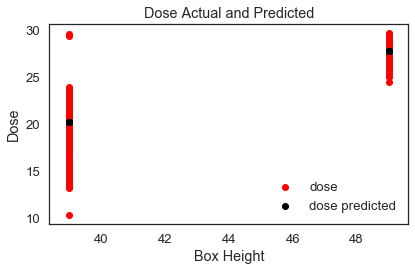

In [5]:
plt.scatter(table.boxHeight, table.dose, c='red', label='dose')
plt.scatter(table.boxHeight, dose_pred, c='black', label='dose predicted')
decorate(xlabel='Box Height', 
             ylabel='Dose',
             title='Dose Actual and Predicted')

#### Simulate dose distribution by running box height 10 iterations 
The box height is discrete seen in the plot above. The simulation is to scale the box height from 50% to 150% and plot the doses in scatter plot. Minimum and Maxium doses are horizantal lines in the plot. If the dose is within the range of minium and maximum doses, the box height is acceptable to adjust.

The simulation runs 10 times to generate graniler level of box height using a linear equation. Only prove of concept is needed to see if the box height is adjustable to make sterilization packaging more efficient under given DUR and box density.

y = 1111 - 4158*d - 1.113*h*x - 493.6*u +2.956*d*h*x +1911*d*u

where 

d = boxBulkDensity

h = boxHeight

u = DUR

The simulation only applies to box height 49, DUR 1.6, and density .25 sterilization setting. The 10 iterations are set on scaling box height from 50% to 150%.

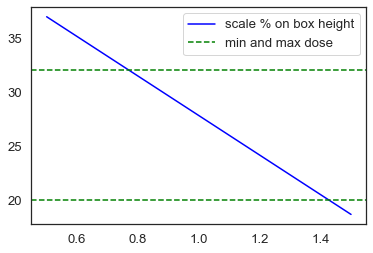

In [6]:
x = linspace(.5, 1.5, 10)
u = 1.6
d = .25
doseMin = 20
doseMax = 32
h = 49

y = 1111 - 4158*d - 1.113*h*x - 493.6*u +2.956*d*h*x +1911*d*u

plt.plot(x, y, color = 'blue', 
         label='scale % on box height')
plt.axhline(y=doseMax, color='green', linestyle='dashed', label = 'min and max dose')
plt.axhline(y=doseMin, color='green', linestyle='dashed')
plt.legend()

Find the box height when the dose line reaches min dose dash lines.

In [7]:
max_scale_rate = (- 20 + 1111 - 4158*d  - 493.6*u +1911*d*u)/(1.113*49 - 2.956*d*49)

1.4263887373131063

The above simulation shows that scaling the box height to 142%, the minimum dose still meets minimum dose requirement. When box height increases, more products can be added to the box. With weight increases at same time, the box bulk density will remain the same. The 42% of increased in box height will improve the efficiency in sterilization load, and save cost.

#### Justify the validity of the model and discuss how you verified it

Comparing means of dose generated from the model to the original dataset provides a form of internal validation. The results of mean1 and mean2 is 19.47 vs 19.76, it proves the predicted dose in model is close to the actual dose.

A new box height that scales up 142% is tested by comparing the corresponding dose to the minimum and maximum dose range (20, 32), it was 20.12, provides external validation. 

In [8]:
mean1 = np. mean(table['dose'])
mean2 = np.mean(dose_pred)
print('Mean of dose in original dataset = ', mean1)
print('Mean of predicted dose =', mean2)

Mean of dose in original dataset =  20.621911623957843
Mean of predicted dose = 20.79211083562827


In [9]:
h = 49*1.42
y = 1111 - 4158*d - 1.113*h - 493.6*u +2.956*d*h +1911*d*u

20.117079999999987

#### Cost Saving from increased box volume
Assume cost per load is $.05, and 100k load per month. By increasing 42 percent of box height, that equals 42 percent of cost saving, which is 2100 dollars/month

In [10]:
saving = 100000*.05*.42

2100.0

#### Conclusions/findings from the model
The simulation using a linear model creates a series of new box height to increase volume in sterilization load. The box height can increase by 142% from 49 up to 69.58, it creates a huge improvement on cost saving on sterilization.

#### Limitations and future work
This work is an oversimplied prove of concept simulation. More cases can be tested using different DUR and BoxBulkDensity.

#### References:
Downey, A. B. Modeling and Simulation in Python. Version 3.4.3. Green Tea Press